# Computer Vision Bootcamp: Assignment 1

## Reading

Take a photo of any object in your room using your mobile or laptop's camera

Upload the image into Colab. Then read the image

In [25]:
# Import the needed libraries
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow # Optional, if U want to use a Colab-compatible cv2.imshow function.

In [24]:
# read the image
I = cv.imread("/content/desk_image.jpg")
print("Image Dimensions =", I.shape[:2])

Image Dimensions = (4624, 2600)


Resize the image to 512*512 pixels using the resize function in OpenCV

In [7]:
resized_image = cv.resize(I, (512, 512))

## Converting

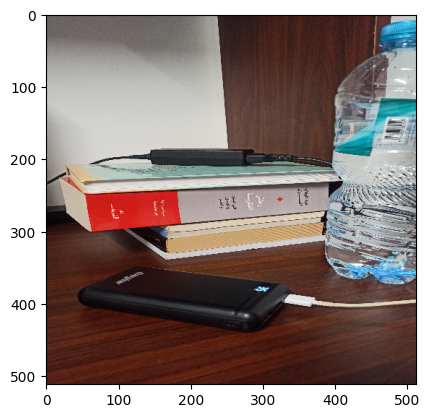

In [8]:
# Convert the reseized image to RGB
rgb_image = cv.cvtColor(resized_image, cv.COLOR_BGR2RGB)

# show the rgb image

# cv2_imshow(rgb_image)
# OR...
plt.imshow(rgb_image)
# plt.axis('off')  # Hide axes
plt.show()

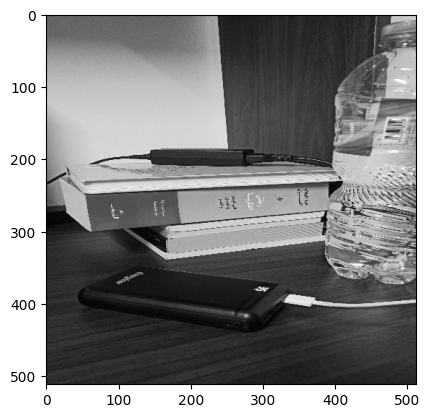

In [9]:
# Convert the reseized image to grayscale
gray_image = cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)

# show the reseized gray image
plt.imshow(gray_image, cmap="gray")
plt.show()

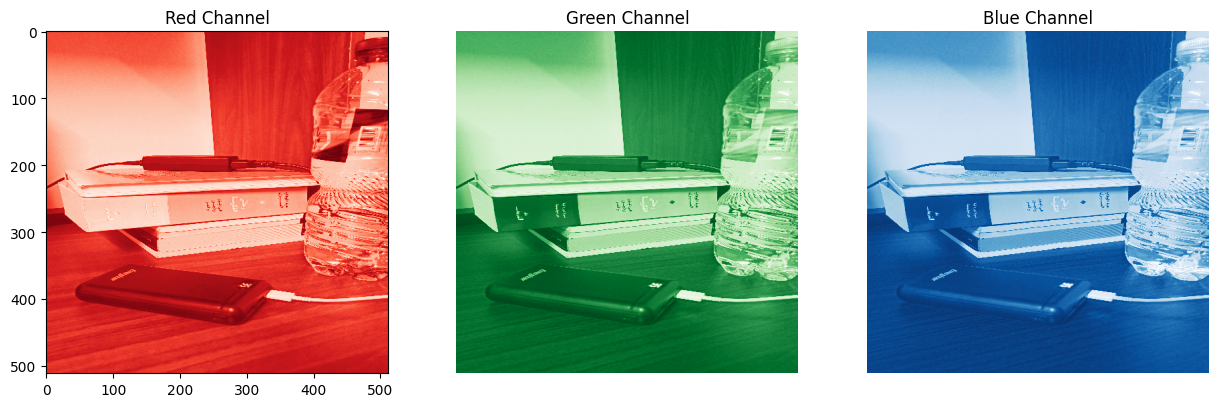

In [22]:
# Split the reseized image into its three color channels
r, g, b = cv.split(rgb_image)

# show the channels in one plot
plt.figure(figsize=(15, 5))

#      Row=1, Cols=3, Fig.No.=1
plt.subplot(1, 3, 1)
plt.imshow(r, cmap='Reds_r')
plt.title('Red Channel')
# plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Greens_r')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Blues_r')
plt.title('Blue Channel')
plt.axis('off')

plt.show()

## Convolutions

### Smoothing

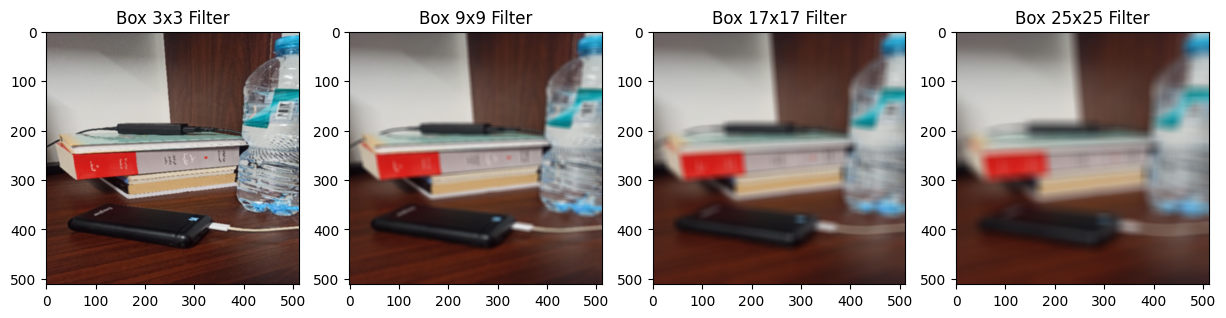

In [44]:
# convole the image with Box mask of size 3, 9, 17, 25 and plot the four results in one plot
sizes = [3, 9, 17, 25]
output_images = []

for size in sizes:
  blur_filter = np.ones((size, size)) / size**2
  output_images.append(cv.filter2D(rgb_image, -1, blur_filter))

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(output_images[0])
plt.title("Box 3x3 Filter")

plt.subplot(1, 4, 2)
plt.imshow(output_images[1])
plt.title("Box 9x9 Filter")

plt.subplot(1, 4, 3)
plt.imshow(output_images[2])
plt.title("Box 17x17 Filter")

plt.subplot(1, 4, 4)
plt.imshow(output_images[3])
plt.title("Box 25x25 Filter")

plt.show()

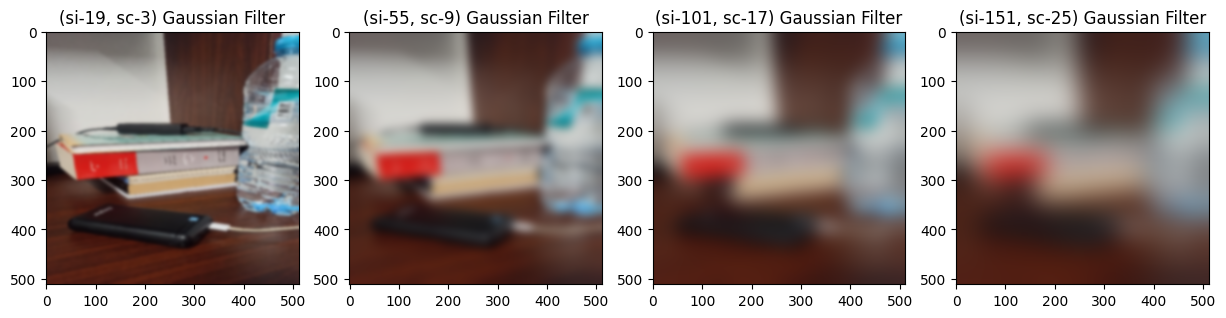

In [34]:
# convole the image with Gaussian mask of Scale 3, 9, 17, 25 (choose suitable mask size) and plot the four results in one plot
g_scales = [3, 9, 17, 25]
g_sizes = [19, 55, 101, 151]  # X6 times of scale
g_output_images = []

for i in range(len(g_scales)):
  g_output_images.append(cv.GaussianBlur(rgb_image, (g_sizes[i], g_sizes[i]), g_scales[i]))

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(g_output_images[0])
plt.title("(si-19, sc-3) Gaussian Filter")

plt.subplot(1, 4, 2)
plt.imshow(g_output_images[1])
plt.title("(si-55, sc-9) Gaussian Filter")

plt.subplot(1, 4, 3)
plt.imshow(g_output_images[2])
plt.title("(si-101, sc-17) Gaussian Filter")

plt.subplot(1, 4, 4)
plt.imshow(g_output_images[3])
plt.title("(si-151, sc-25) Gaussian Filter")

plt.show()

### Difference

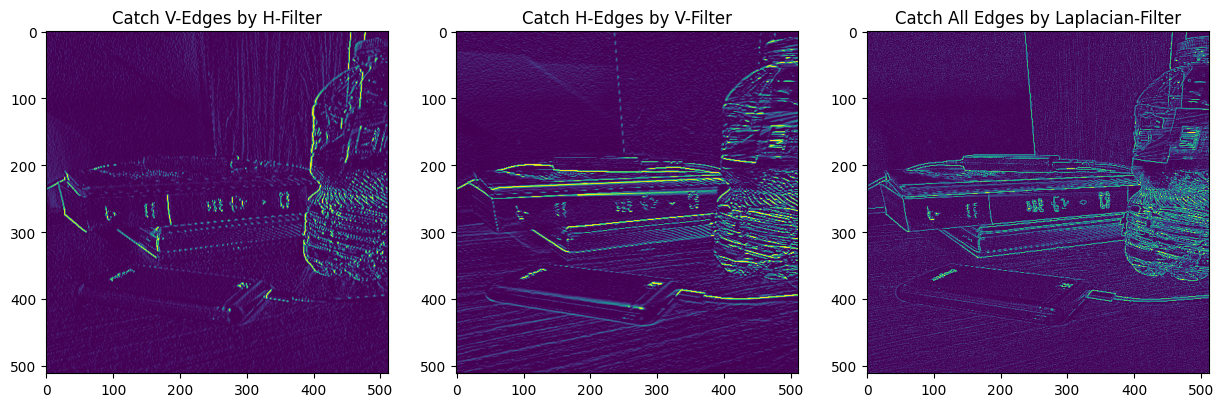

In [43]:
# convole the image with horizontal mask to catch vertical edges
h_filter = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

catch_v_edges = cv.filter2D(gray_image, -1, h_filter)

# convole the image with vertical mask to catch horizontal edges
v_filter = np.transpose(h_filter)
catch_h_edges = cv.filter2D(gray_image, -1, v_filter)

# convole the image with a Laplacian mask to catch all edges
laplacian_filter = np.array([[-1, -1, -1],
                              [-1, 8, -1],
                              [-1, -1, -1]])
catch_all_edges = cv.filter2D(gray_image, -1, laplacian_filter)

# plot the three figures along with the gray scale resized image in one plot (4 images in total: grayscale, vertical edges, horizontal edges, and all edges)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(catch_v_edges)
plt.title("Catch V-Edges by H-Filter")

plt.subplot(1, 3, 2)
plt.imshow(catch_h_edges)
plt.title("Catch H-Edges by V-Filter")

plt.subplot(1, 3, 3)
plt.imshow(catch_all_edges)
plt.title("Catch All Edges by Laplacian-Filter")

plt.show()